# Importing Required Libraries & Datasets

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

In [218]:
sns.set(rc={'figure.figsize':(15,10)})

In [219]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [220]:
raw_data.head(7)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
312505,312443,500,500.0,450.0,36 months,9.76%,16.08,B,B2,"Hughes, Hubbard & Reed LLP",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
242695,242682,500,500.0,500.0,36 months,10.71%,16.31,B,B5,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
216698,174214,500,500.0,500.0,36 months,10.46%,16.25,B,B5,THe University of Illinois,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
211133,210644,500,500.0,475.0,36 months,11.41%,16.47,C,C3,Global Travel International -and- Global Domai...,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
164346,163835,500,500.0,400.0,36 months,8.07%,15.69,A,A4,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
306018,305720,700,700.0,700.0,36 months,12.29%,23.35,C,C5,SDSU Residential Life,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
311591,311571,725,725.0,650.0,36 months,7.37%,22.51,A,A1,"Team Awesome Productions, Inc.",...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1. Cleaning Data

### This step involves cleaning data and converting them into respective formats which can be easily considered for quick calculations

### 1.0 Formatting Funded Amount Column Into Funding Category

In [221]:
raw_data['funded_amount_category'] = raw_data['funded_amnt'].apply(lambda x: math.ceil(x/1000.00) * 1000)

### 1.1 Formatting Loan Term Column

In [222]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [223]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

### 1.2 Formatting Interest Column to Float Value

In [224]:
def extract_valid_float_from_interest_column(row):
    row = re.sub('[%, ]', '', str(row))
    return float(row)

In [225]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_interest_column)

### 1.3 Creating Categorical Column For Interest

In [226]:
raw_data['int_rate_category'] = raw_data['int_rate'].apply(lambda x: math.ceil(x))

### 1.3 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column. (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)

In [227]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with dropping the alphabet from Sub-Grade column

In [228]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [229]:
raw_data['sub_grade'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

### 1.4 Formatting Employee Length (Years of Experience) Column

In [230]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [231]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

### 1.5 Formatting Ownership Column (Creating new mapped column)

In [232]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [233]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}

In [234]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

### 1.6 Formatting Annual Income / Salary Column (Creating new mapped column)

In [235]:
raw_data['annual_inc_category'] = raw_data['annual_inc'].apply(lambda x: math.ceil(x/10000.00) * 10000)

### 1.6 Formatting Salary Verification Column (Creating new mapped column)

In [236]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [237]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

In [238]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

### 1.7 Formatting Loan Issue Date to datetime object

In [239]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

### 1.8 Formatting Loan Status Column (Creating new mapped column)

In [240]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [241]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

In [242]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

### 1.9 Payment Plan Column can be dropped off, as all the records in this column contains same value

In [243]:
if 'pymnt_plan' in raw_data.columns:
    raw_data = raw_data.drop(columns=['pymnt_plan'])

### 1.10 Formatting Purpose Column

In [244]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

### 1.11 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [245]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [246]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

### 1.12 Formatting Earliest Credit Line Column to Valid Date object

In [247]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [248]:
raw_data.earliest_cr_line.describe()

<ipython-input-248-ddce41ebc1d2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.earliest_cr_line.describe()


count                   39717
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

### 1.13 Formatting Months Since Last Delinq(Default) & Months Since Last Record Column to Valid format

In [249]:
def clean_months_since_last_column(row):
    if type(row) == str:
        return np.nan
    else:
        return float(row)

In [250]:
raw_data['mths_since_last_delinq'] = raw_data.mths_since_last_delinq.apply(clean_months_since_last_column)

In [251]:
raw_data['mths_since_last_record'] = raw_data.mths_since_last_record.apply(clean_months_since_last_column)

### 1.14 Formatting Months Since Last Delinq(Default) & Months Since Last Record Column to Valid format

In [252]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_interest_column)

### 1.15 Initial Status Column can be dropped off, as all the records in this column contains same value.

In [253]:
if 'initial_list_status' in raw_data.columns:
    raw_data = raw_data.drop(columns=['initial_list_status'])

In [254]:
raw_data.out_prncp_inv.dtypes

dtype('float64')

### 1.16 Formatting Last Payment, Next Payment & Last Credit Pull Date Column to Valid format

In [255]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [256]:
raw_data['next_pymnt_d'] = pd.to_datetime(raw_data.next_pymnt_d, format='%b-%y')

In [257]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

### 1.17 Application Type Column can be dropped off, as all the records in this column contains same value.

In [258]:
if 'application_type' in raw_data.columns:
    raw_data = raw_data.drop(columns=['application_type'])

### 1.18 All the columns after Application Type Column are in the correct format (i.e. float value). Hence, those columns need not have to be cleaned

# ==> 2. Comparing Data Between Charged Off & Fully Paid Customers <==

### 2.1 Comparing "Funded_Amount" Column across "Loan_Status" Column

##### 1. Converting Funding Amount Data into bins each of size 1000 (such that any value between 0 & 1000 will be termed as 1000, any value between 1001 & 2000 will be termed as 2000)
##### 2. Finding Number of Customers according to Loan Status & then segregating into different funding amount category
##### 3. Calculating percentage of member from each group of loan status with respect to total members in that group.

In [259]:
plot_this = raw_data.pivot_table(index='loan_status', columns='funded_amount_category', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

funded_amount_category,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,...,27000,28000,29000,30000,31000,32000,33000,34000,35000,total
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,48,196,308,312,467,338,253,389,201,483,...,13,22,4,62,6,7,4,4,128,5627
Current,3,9,20,24,40,38,28,38,20,40,...,9,15,2,38,3,5,3,4,55,1140
Fully Paid,263,1195,1852,1990,2924,2549,1831,2474,1305,3174,...,35,135,31,270,13,38,16,20,380,32950


<AxesSubplot:xlabel='funded_amount_category', ylabel='loan_status'>

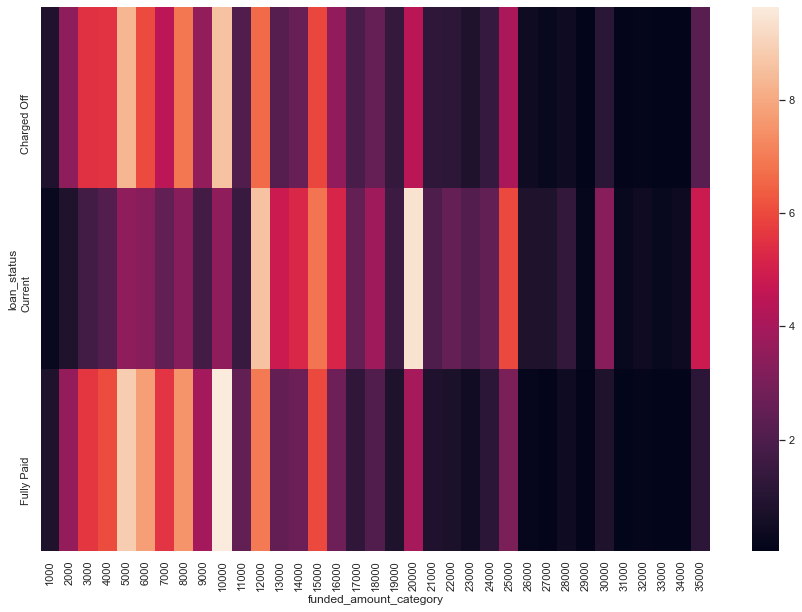

In [260]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100)

In [261]:
plot_this = raw_data.pivot_table(index='loan_status', columns='term', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

term,36,60,total
loan_status,,,
Charged Off,3227.0,2400.0,5627.0
Current,0.0,1140.0,1140.0
Fully Paid,25869.0,7081.0,32950.0


<AxesSubplot:xlabel='term', ylabel='loan_status'>

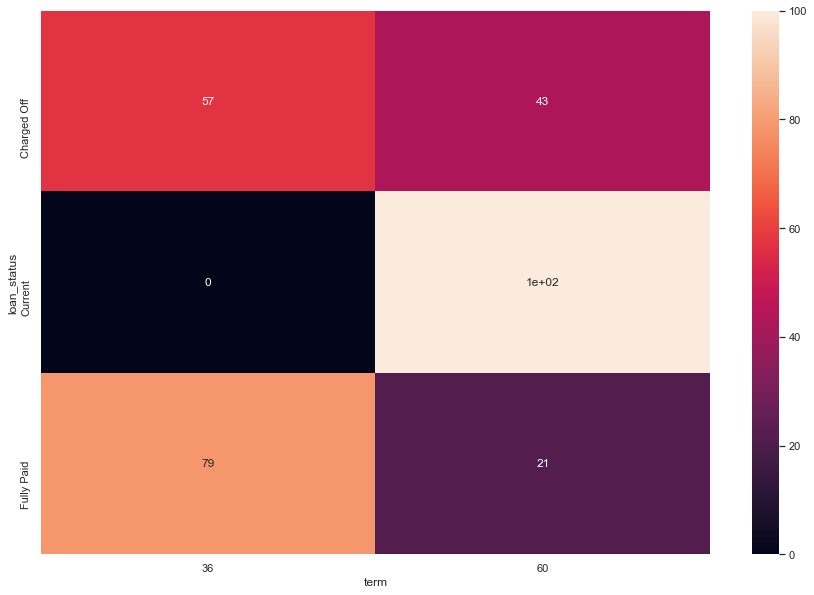

In [262]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [263]:
plot_this = raw_data.pivot_table(index='loan_status', columns='int_rate_category', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

int_rate_category,6,7,8,9,10,11,12,13,14,15,...,17,18,19,20,21,22,23,24,25,total
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,55.0,119.0,266.0,145.0,245.0,454.0,612.0,525.0,639.0,477.0,...,461.0,365.0,230.0,210.0,147.0,78.0,56.0,13.0,2.0,5627.0
Current,2.0,0.0,13.0,27.0,35.0,99.0,132.0,116.0,94.0,88.0,...,84.0,107.0,75.0,93.0,53.0,19.0,23.0,6.0,1.0,1140.0
Fully Paid,1291.0,2350.0,4137.0,1445.0,2263.0,3554.0,3725.0,2812.0,3283.0,2184.0,...,1391.0,949.0,612.0,420.0,282.0,106.0,61.0,23.0,2.0,32950.0


<AxesSubplot:xlabel='int_rate_category', ylabel='loan_status'>

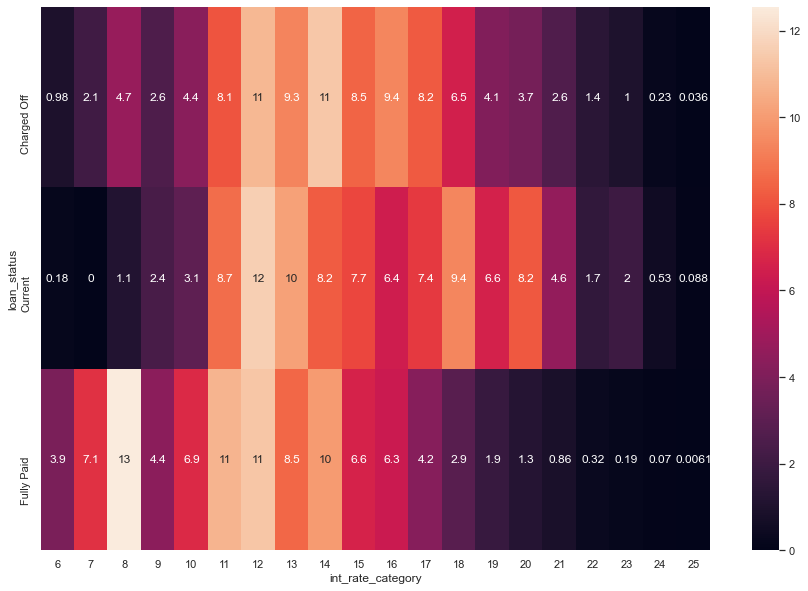

In [264]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [265]:
plot_this = raw_data.pivot_table(index='loan_status', columns='grade', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

grade,A,B,C,D,E,F,G,total
loan_status,,,,,,,,
Charged Off,602,1425,1347,1118,715,319,101,5627
Current,40,345,264,222,179,73,17,1140
Fully Paid,9443,10250,6487,3967,1948,657,198,32950


<AxesSubplot:xlabel='grade', ylabel='loan_status'>

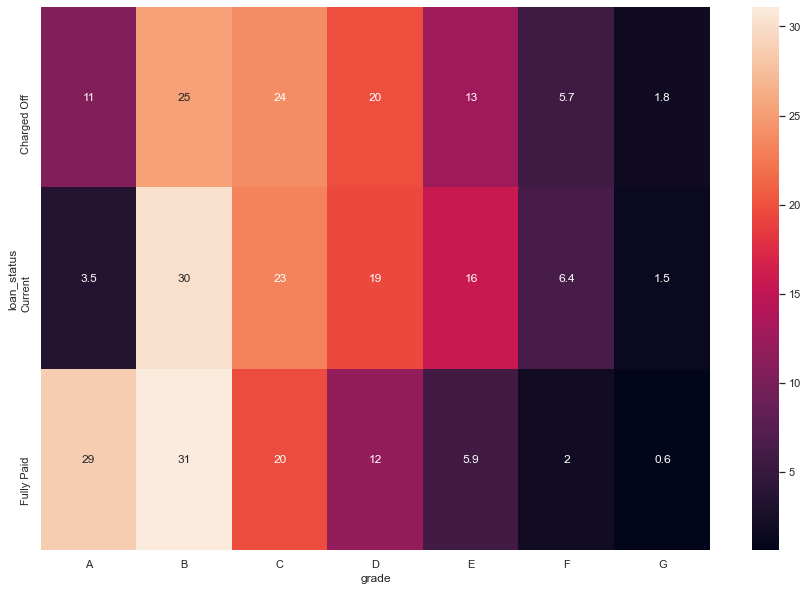

In [266]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [267]:
plot_this = raw_data.pivot_table(index='loan_status', columns='sub_grade', values='member_id', aggfunc='count')
plot_this['total'] = plot_this.sum(axis=1)
plot_this

sub_grade,1,2,3,4,5,total
loan_status,,,,,,
Charged Off,1024,1155,1159,1126,1163,5627
Current,189,257,241,230,223,1140
Fully Paid,6019,6495,6815,6937,6684,32950


<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

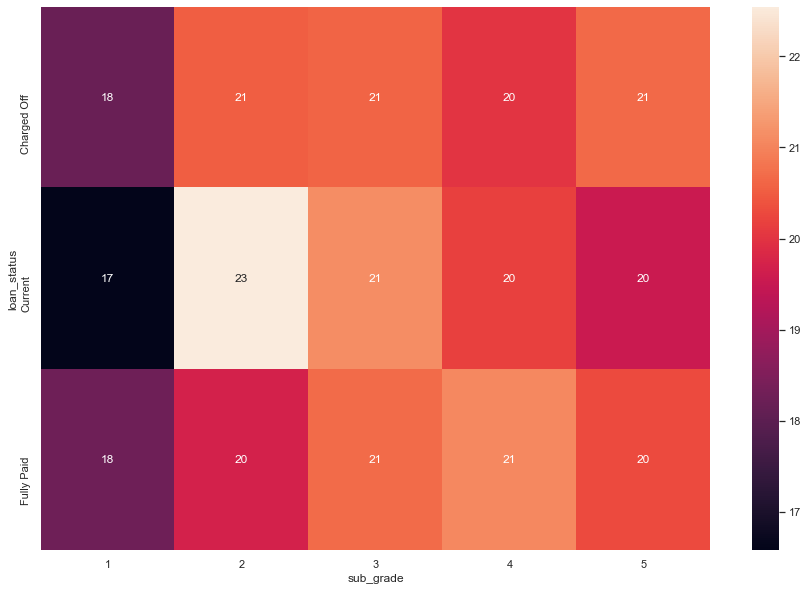

In [268]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [269]:
plot_this = raw_data.pivot_table(index='loan_status', columns='home_ownership', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,total
loan_status,,,,,,
Charged Off,2327.0,0.0,18.0,443.0,2839.0,5627.0
Current,638.0,0.0,0.0,83.0,419.0,1140.0
Fully Paid,14694.0,3.0,80.0,2532.0,15641.0,32950.0


<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

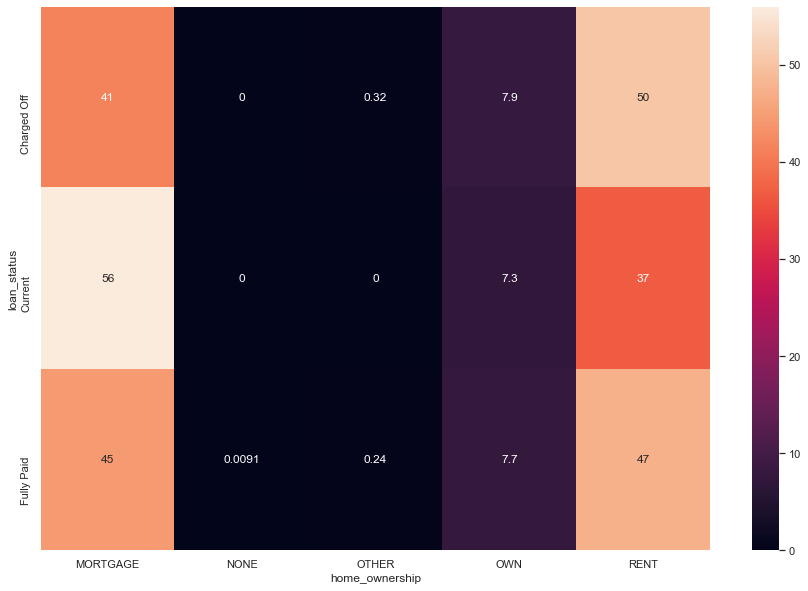

In [270]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [271]:
plot_this = raw_data.pivot_table(index='loan_status', columns='annual_inc_category', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

annual_inc_category,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,...,1200000,1250000,1370000,1440000,1790000,1900000,2040000,3900000,6000000,total
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,20.0,217.0,602.0,912.0,862.0,867.0,559.0,465.0,305.0,226.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5627.0
Current,1.0,8.0,64.0,106.0,176.0,169.0,125.0,115.0,106.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1140.0
Fully Paid,78.0,865.0,2769.0,4235.0,4829.0,4705.0,3537.0,3060.0,2205.0,1778.0,...,4.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,32950.0


<AxesSubplot:xlabel='annual_inc_category'>

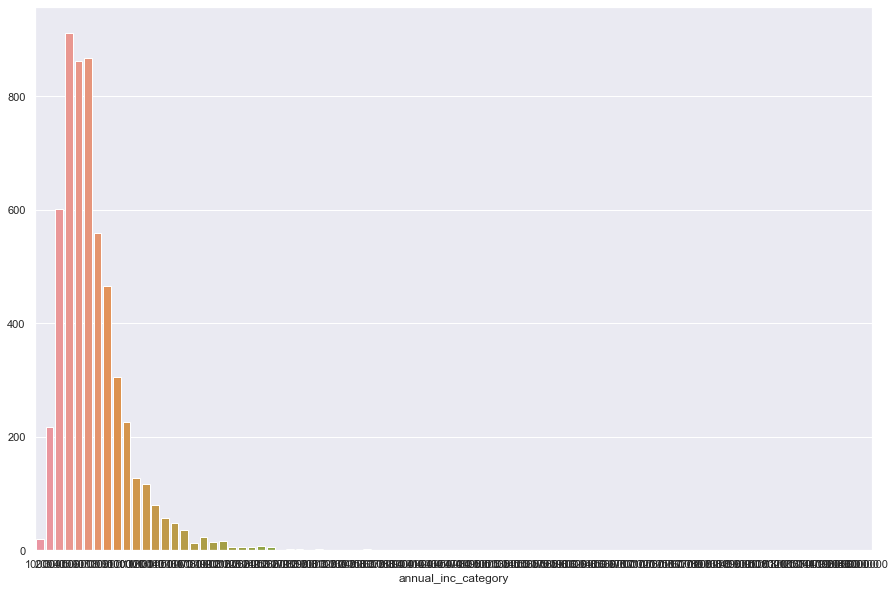

In [272]:
sns.barplot(x = plot_this.iloc[0, :-1].index, y = plot_this.iloc[0, :-1].values)

<AxesSubplot:xlabel='annual_inc_category'>

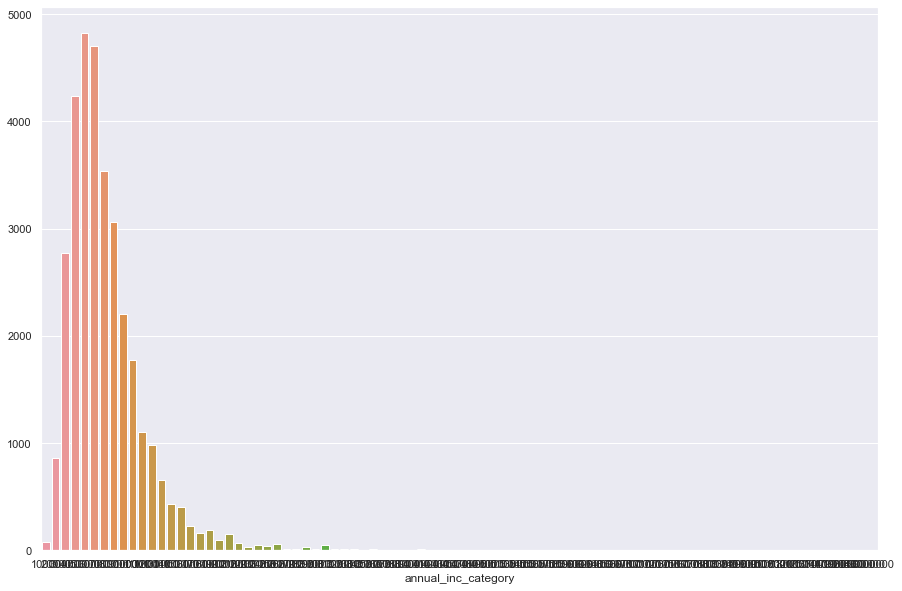

In [273]:
sns.barplot(x = plot_this.iloc[2, :-1].index, y = plot_this.iloc[2, :-1].values)

In [274]:
plot_this = raw_data.pivot_table(index='loan_status', columns='verification_status', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

verification_status,Not Verified,Source Verified,Verified,total
loan_status,,,,
Charged Off,2142,1434,2051,5627
Current,227,310,603,1140
Fully Paid,14552,8243,10155,32950


<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

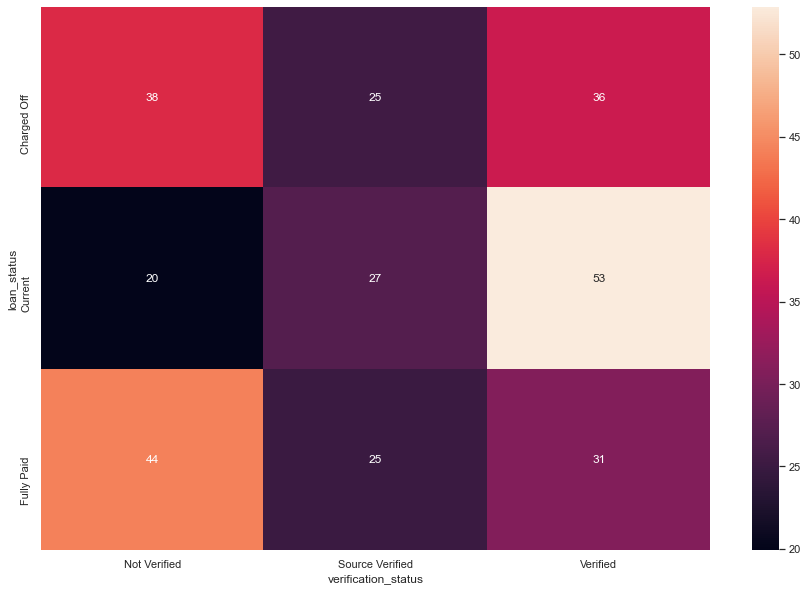

In [275]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [277]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year

In [278]:
plot_this = raw_data.pivot_table(index='loan_status', columns='issue_d_year', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

issue_d_year,2007,2008,2009,2010,2011,total
loan_status,,,,,,
Charged Off,45.0,247.0,594.0,1485.0,3256.0,5627.0
Current,0.0,0.0,0.0,0.0,1140.0,1140.0
Fully Paid,206.0,1315.0,4122.0,10047.0,17260.0,32950.0


<AxesSubplot:xlabel='issue_d_year', ylabel='loan_status'>

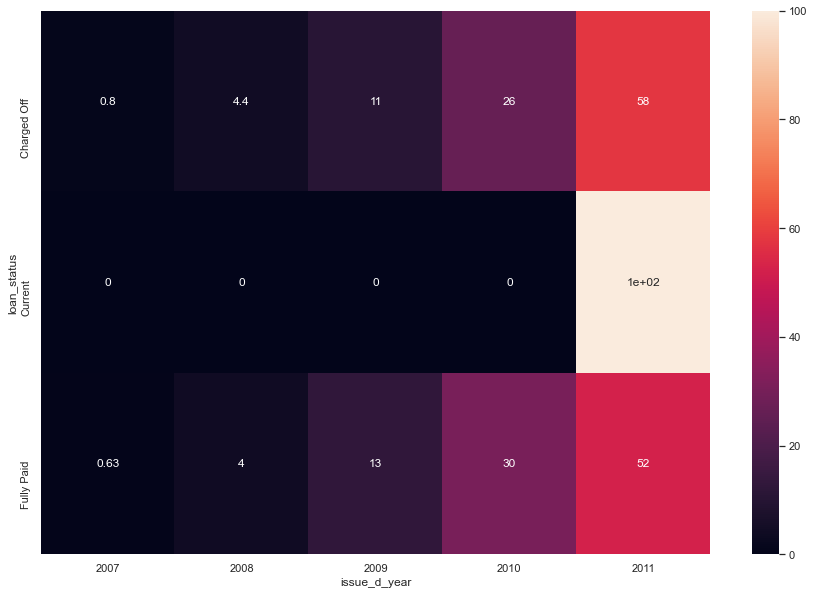

In [279]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [280]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month

In [281]:
plot_this = raw_data.pivot_table(index='loan_status', columns='issue_d_month', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

issue_d_month,1,2,3,4,5,6,7,8,9,10,11,12,total
loan_status,,,,,,,,,,,,,
Charged Off,321.0,290.0,347.0,370.0,466.0,483.0,479.0,468.0,547.0,580.0,598.0,678.0,5627.0
Current,0.0,0.0,1.0,3.0,80.0,99.0,125.0,130.0,150.0,173.0,161.0,218.0,1140.0
Fully Paid,2058.0,2068.0,2344.0,2461.0,2453.0,2697.0,2872.0,2920.0,2951.0,3181.0,3408.0,3537.0,32950.0


<AxesSubplot:xlabel='issue_d_month', ylabel='loan_status'>

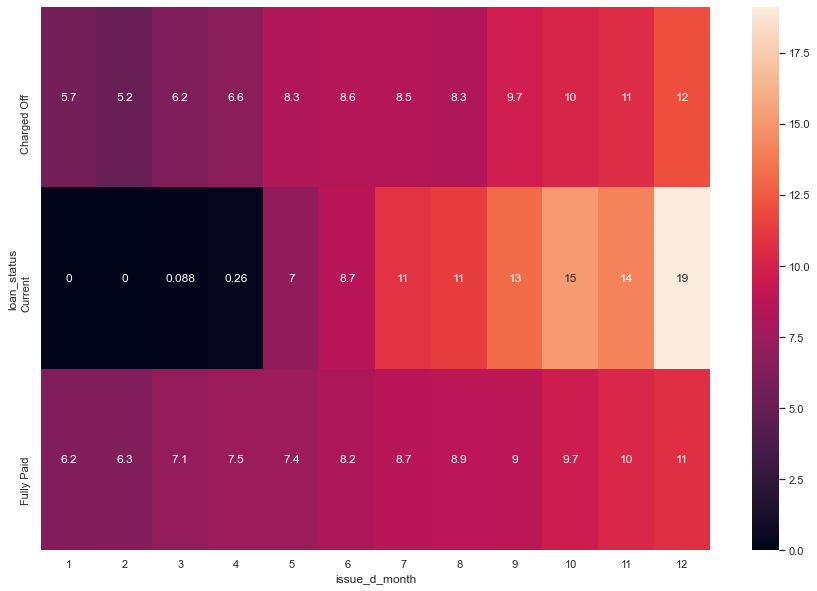

In [282]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [283]:
plot_this = raw_data.pivot_table(index='loan_status', columns='purpose', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

purpose,Car,Credit Card,Debt Consolidation,Educational,Home Improvement,House,Major Purchase,Medical,Moving,Other,Renewable Energy,Small Business,Vacation,Wedding,total
loan_status,,,,,,,,,,,,,,,
Charged Off,160.0,542.0,2767.0,56.0,347.0,59.0,222.0,106.0,92.0,633.0,19.0,475.0,53.0,96.0,5627.0
Current,50.0,103.0,586.0,0.0,101.0,14.0,37.0,12.0,7.0,128.0,1.0,74.0,6.0,21.0,1140.0
Fully Paid,1339.0,4485.0,15288.0,269.0,2528.0,308.0,1928.0,575.0,484.0,3232.0,83.0,1279.0,322.0,830.0,32950.0


<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

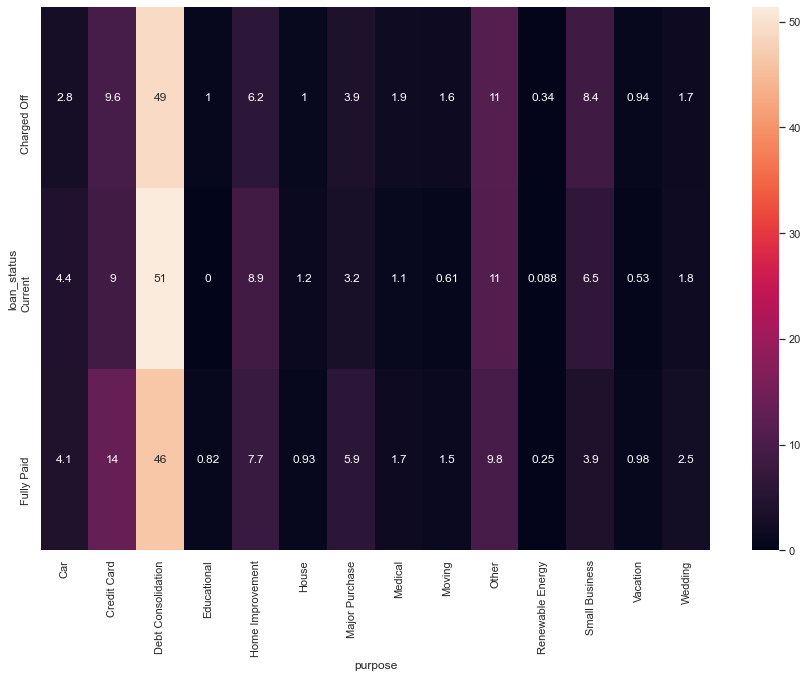

In [284]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100, annot=True)

In [285]:
plot_this = raw_data.pivot_table(index='loan_status', columns='addr_state_name', values='member_id', aggfunc='count').fillna(0)
plot_this['total'] = plot_this.sum(axis=1)
plot_this

addr_state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,54.0,15.0,123.0,27.0,1125.0,98.0,94.0,12.0,504.0,215.0,...,2.0,316.0,40.0,6.0,177.0,127.0,21.0,63.0,4.0,5612.0
Current,17.0,2.0,30.0,10.0,150.0,26.0,25.0,1.0,85.0,39.0,...,0.0,68.0,6.0,1.0,38.0,22.0,5.0,20.0,3.0,1137.0
Fully Paid,381.0,63.0,726.0,208.0,5824.0,668.0,632.0,101.0,2277.0,1144.0,...,15.0,2343.0,212.0,47.0,1192.0,691.0,151.0,377.0,76.0,32754.0


<AxesSubplot:xlabel='addr_state_name', ylabel='loan_status'>

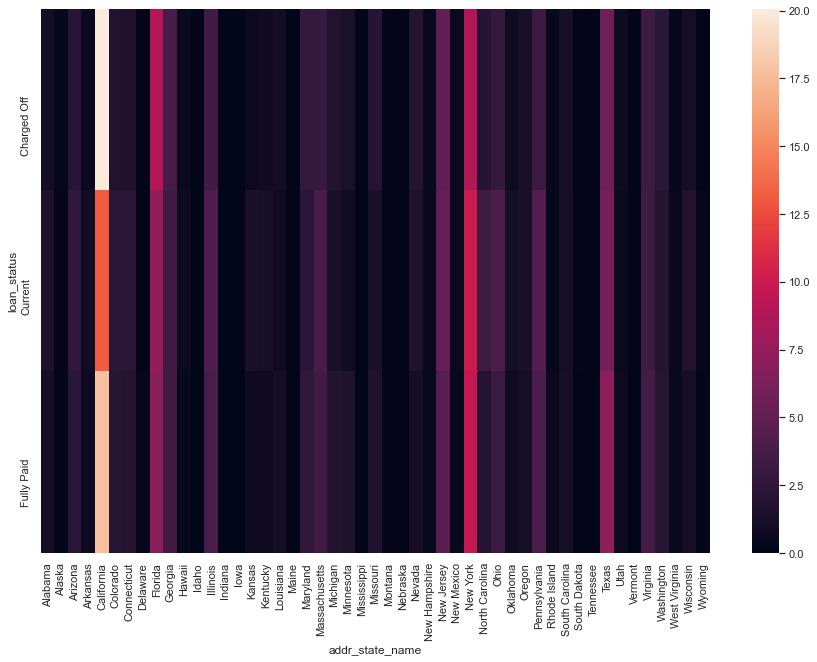

In [286]:
sns.heatmap(plot_this.iloc[:,:-1].div(plot_this["total"], axis=0)*100)